In [1]:
from src.ALMApy import get_k2_vs_radius
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

Here we asses how the $k_2$ love number changes with differing sizes of the atmosphere. We use a solid (rocky) homogeneous core with an atmosphere of varying size. The fiducial parameters are:
- The core radius is equal to the radius of Neptune, $R_\mathrm{Nep}=24\times 10^6\textrm{ m}$.
- The core density is equal to the density of Neptune, $\rho_\mathrm{Nep}=1642\textrm{ kg m}^{-3}$.
- The core rigidity is taken from ALMA3's `simple-Earth` model, which is $10^11$
- The core viscosity is taken from ALMA3's `simple-Earth` model, which is $10^21$
- The atmosphere starts at the outer radius of the core, and extends to varying radii, up to the radius of Jupiter $R_\mathrm{Jup}=69.6\times 10^6\textrm{ m}$
- The atmosphere has a density equal to the density of the atmosphere at the surface of the earth, $\rho_\mathrm{air}=1.293\textrm{kg m}^{-3}$
- The atmosphere's viscosity is equal to the viscosity of air, $\nu=5\times 10^{-5}$
- The atmosphere's rigiditiy is negligible

In [28]:
G = 6.67e-11

# Dimensions
R_jupiter = 69.9e6
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21


In [29]:
def get_k2_core(R_core, mu_core, rho_core):
    M_core = 4*np.pi/3*R_core**3*rho_core
    g_core = G*M_core/R_core**2
    return 3/(2*(1+19*mu_core/(2*g_core*rho_core*R_core)))

### Varying core radii

In [4]:
no_atm_radii = 100
log_max_atm_radius = 1 #maximum radius = 10**log_max_atm_radius * R_jupiter

no_core_radii = 10
min_core_radius = 0.5*R_neptune
max_core_radius = 5*R_neptune
core_radii = np.linspace(min_core_radius, max_core_radius, no_core_radii)

data = []

rerun_sim = False
if rerun_sim:
    for i,core_radius in enumerate(core_radii):
        atmosphere_radii = (np.logspace(-3,log_max_atm_radius,no_atm_radii)-10**-3)*R_jupiter+core_radius
        k2 = get_k2_vs_radius(core_radius, atmosphere_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])
        data.append({"core_radius": core_radius,
                     "radius": atmosphere_radii,
                     "k2": k2,})
        print(f"{(i+1)/len(core_radii)*100:.0f}% done")
    np.save("k2_fitting_data.npy", data)
else:
    data = np.load("k2_fitting_data.npy", allow_pickle=True)

### Giant atmosphere range

In [5]:
log_max_atm_radius = 3
atm_radii = (np.logspace(-3,log_max_atm_radius,no_atm_radii)-10**-3)*R_jupiter+min_core_radius
k2 = get_k2_vs_radius(min_core_radius, atm_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])
giant_atmosphere = {"core_radius": min_core_radius,
                    "radius": atm_radii,
                    "k2": k2}

Ratm=12300000.0, t=[0.001, 1.0, 1000.0], k2=[0.16122647, 0.54510099, 1.5]
Ratm=12310468.013978302, t=[0.001, 1.0, 1000.0], k2=[0.1609511, 0.54307176, 1.4939221]
Ratm=12322503.686277775, t=[0.001, 1.0, 1000.0], k2=[0.16010837, 0.54021865, 1.486065]
Ratm=12336341.78469841, t=[0.001, 1.0, 1000.0], k2=[0.15927097, 0.53738356, 1.4782574]
Ratm=12352252.235160537, t=[0.001, 1.0, 1000.0], k2=[0.15824759, 0.53391874, 1.4687157]
Ratm=12370545.386879297, t=[0.001, 1.0, 1000.0], k2=[0.15704262, 0.52983911, 1.4574808]
Ratm=12391578.066035813, t=[0.001, 1.0, 1000.0], k2=[0.15572371, 0.5253736, 1.4451832]
Ratm=12415760.536027974, t=[0.001, 1.0, 1000.0], k2=[0.15423274, 0.52032548, 1.4312812]
Ratm=12443564.500067456, t=[0.001, 1.0, 1000.0], k2=[0.15251504, 0.51450956, 1.4152646]
Ratm=12475532.302221637, t=[0.001, 1.0, 1000.0], k2=[0.15058021, 0.50795829, 1.3972229]
Ratm=12512287.5063759, t=[0.001, 1.0, 1000.0], k2=[0.1484389, 0.5007077, 1.3772552]
Ratm=12554547.059469534, t=[0.001, 1.0, 1000.0], k2=[0

### Default plot

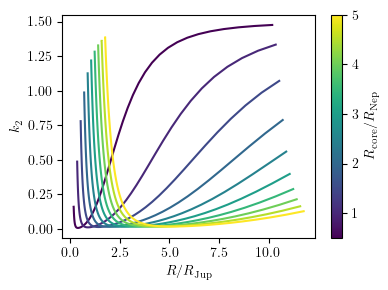

In [ ]:
norm = mcolors.Normalize(vmin=min_core_radius/R_neptune, vmax=max_core_radius/R_neptune)
cmap = cm.viridis

fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    ax.plot(data[i]["radius"]/R_jupiter, data[i]["k2"], color=cmap(norm(core_radius/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{Jup}$")
ax.set_ylabel("$k_2$")
fig.tight_layout()
fig.savefig("figures/k2_vs_R.png", dpi=300)
plt.show()


### Log-scale

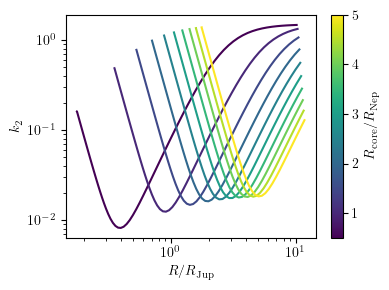

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    ax.plot(data[i]["radius"]/R_jupiter, data[i]["k2"], color=cmap(norm(core_radius/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{Jup}$")
ax.set_ylabel("$k_2$")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2_vs_R_log.png", dpi=300)
plt.show()


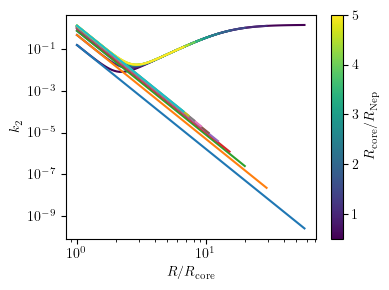

In [ ]:


fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    ax.plot(data[i]["radius"]/core_radius, data[i]["k2"], color=cmap(norm(core_radius/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2$")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2_vs_R_Rcore.png", dpi=300)
plt.show()


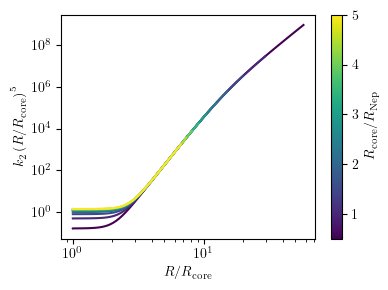

In [10]:
R_min = np.zeros(no_core_radii)

fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    idx_min = np.argmin(data[i]["k2"])
    R_min[i] = data[i]["radius"][idx_min]
    ax.plot(data[i]["radius"]/core_radius, data[i]["k2"]*(data[i]["radius"]/core_radius)**5, color=cmap(norm(core_radius/R_neptune)))
    #ax.axvline(R_min[i]/R_jupiter)
    #ax.axvline(core_radius/R_jupiter, color=cmap(norm(core_radius/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()
fig.savefig("figures/k2R5_vs_R_Rcore.png", dpi=300)
plt.show()


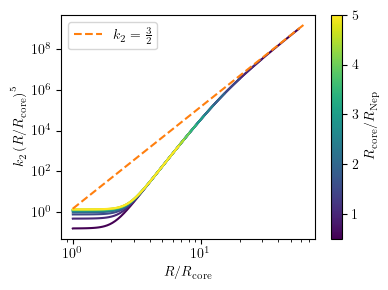

In [ ]:
R_min = np.zeros(no_core_radii)

fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    ax.plot(data[i]["radius"]/core_radius, data[i]["k2"]*(data[i]["radius"]/core_radius)**5, color=cmap(norm(core_radius/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

x = np.logspace(0,1.8,100)
ax.plot(x,3/2*x**5, color="C1", linestyle="--", label="$k_2=\\frac{3}{2}$")
ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()
ax.legend()
fig.savefig("figures/k2R5_vs_R_Rcore_x5.png", dpi=300)
plt.show()


### Migration rate

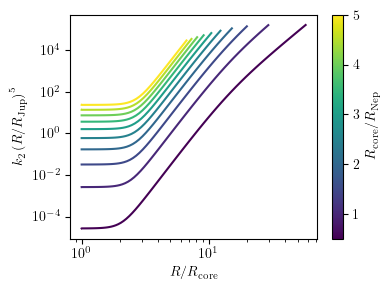

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
for i in range(len(data)):
    ax.plot(atm_radii/data[i]["core_radius"], data[i]["k2"]*(data[i]["radius"]/R_jupiter)**5, color=cmap(norm(data[i]["core_radius"]/R_neptune)))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{Jup}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
fig.tight_layout()
plt.show()


### Relative to $R_\mathrm{core}$

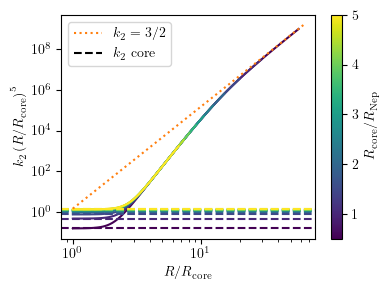

In [31]:
fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    R_core = data[i]["core_radius"]
    R_atm = data[i]["radius"]
    k2 = data[i]["k2"]
    ax.plot(R_atm/R_core, k2*(R_atm/R_core)**5, color=cmap(norm(core_radius/R_neptune)))

    # Plot lines for core k2
    # k2core = k2_core(rigidity_earth, rho_neptune, core_radius)
    ax.axhline(get_k2_core(core_radius, rigidity_earth, rho_neptune), linestyle="--", color=cmap(norm(core_radius/R_neptune)))

# Plot line for k2=3/2
R_interp = np.logspace(0,1.8,100)
ax.plot(R_interp, 3/2*R_interp**5, color="C1", linestyle=":", label="$k_2=3/2$")

# Create legend
ax.plot([], [], color="black", linestyle="--", label="$k_2$ core")

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
fig.tight_layout()
fig.savefig("figures/k2_vs_R_k2core_32", dpi=300)
plt.show()


Zoomed-in

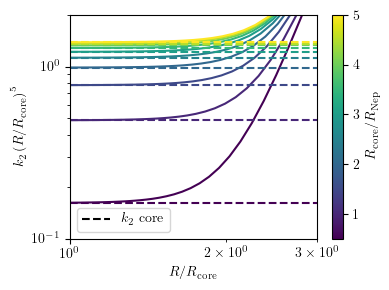

In [33]:
fig, ax = plt.subplots(figsize=(4,3))
for i,core_radius in enumerate(core_radii):
    R_core = data[i]["core_radius"]
    R_atm = data[i]["radius"]
    k2 = data[i]["k2"]
    ax.plot(R_atm/R_core, k2*(R_atm/R_core)**5, color=cmap(norm(core_radius/R_neptune)))
    ax.axhline(get_k2_core(core_radius, rigidity_earth, rho_neptune), linestyle="--", color=cmap(norm(core_radius/R_neptune)))

ax.plot([], [], color="black", linestyle="--", label="$k_2$ core")

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$R_\\mathrm{core}/R_\\mathrm{Nep}$")

ax.set_xlabel("$R/R_\\mathrm{core}$")
ax.set_ylabel("$k_2\\left(R/R_\\mathrm{core}\\right)^5$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(1,3)
ax.set_ylim(0.1,2)
ax.legend()
fig.tight_layout()
fig.savefig("figures/k2_vs_R_k2core_zoom.png", dpi=300)
plt.show()


# Fitting

In [16]:
def rho(x, rho_core, rho_atm):
    return (rho_core+rho_atm*(x**3-1))/x**3

def g(x, R_core, rho_core, rho_atm):
    return 4*np.pi/3*G*R_core*(rho_core+rho_atm*(x**3-1))/x**2

def mu(x, mu_core, a0,a1,a2,a3,a4,a5,a6):
    return mu_core*(a0+a1*x+a2*x**2+a3*x**3+a4*x**4+a5*x**5+a6*x**6)#2*mu_core/(1+x**n)

def k2_core(R_core, rho_core, mu_core):
    M_core = 4*np.pi/3*R_core**3*rho_core
    g_core = G*M_core/R_core**2
    return 3/(2*(1+19*mu_core/(2*g_core*rho_core*R_core)))

def k2_func(x, R_core, rho_core, rho_atm, mu_core,a0,a1,a2,a3,a4,a5,a6):
    return 3/(2*(1+19*mu(x,mu_core,a0,a1,a2,a3,a4,a5,a6)/(2*g(x,R_core,rho_core,rho_atm)*rho(x, rho_core,rho_atm)*x*R_core)))

def mu(x,mu_core):
    return mu_core*x**0.4

def k2_func(x, R_core, rho_core, rho_atm, mu_core):
    return 3/(2*(1+19*mu(x))/(2*g(x,R_core,rho_core,rho_atm)*rho(x, rho_core,rho_atm)*x*R_core))

In [17]:
print(f"rho core={rho_neptune}")
print(f"rho atm = {rho_air}")
print(f"mu_core = {rigidity_earth:.1e}")
print(f"R_core = {R_neptune:.1e}")


rho core=1642.124293334446
rho atm = 1.293
mu_core = 1.0e+11
R_core = 2.5e+07


[ 1.23970631e+11 -8.01168898e-01]


<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7518/340006290.py:38: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel("$R/R_\mathrm{core}$")
/tmp/ipykernel_7518/340006290.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("$\mu$")
/tmp/ipykernel_7518/340006290.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


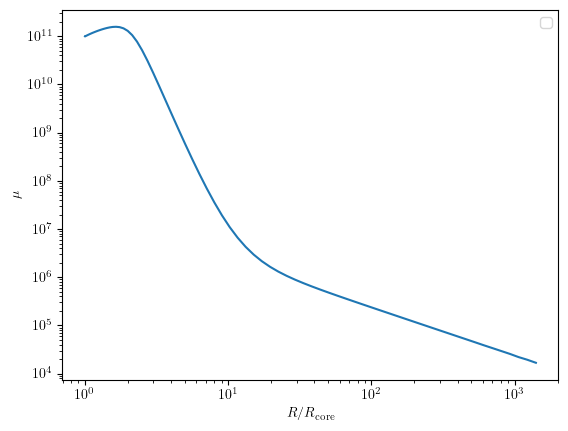

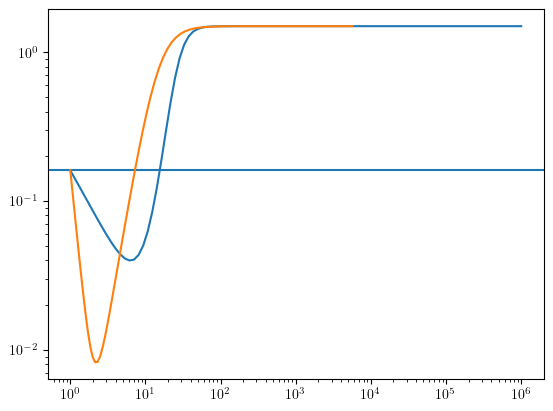

In [18]:
G = 6.67e-11
mu_core = rigidity_earth#1e11
R_core = min_core_radius#2.5e7
rho_core = rho_neptune#1640
rho_atm = rho_air#1.3

def mu(x):
    return mu_core*x**-3#2*mu_core/(1+x**4)#0.4

def g(x):
   return 4*np.pi/3*G*R_core*(rho_core+rho_atm*(x**3-1))/x**2

def rho(x):
    return (rho_core+rho_atm*(x**3-1))/x**3

def k2(x):
    return 3/(2*(1+19*mu(x)/(2*g(x)*rho(x)*x*R_core)))

x_interp = np.logspace(0,6,100)


R_atm = giant_atmosphere["radius"]
k2_values = giant_atmosphere["k2"]

x = R_atm/min_core_radius

linear = lambda x,a,b: a*x**b

mu_sim = 2*g(x)*rho(x)*R_core*x/19*(3/(2*k2_values)-1)
popt,pcov = curve_fit(linear, x[:-10], mu_sim[:-10], p0=[1e11,-2])
print(popt)
fig, ax = plt.subplots()
ax.plot(x[:-10],mu_sim[:-10])
ax.set_xscale("log")
ax.set_yscale("log")
#ax.plot(x,linear(x,*popt), label="fit")
#ax.plot(x,1e11*x**-3)
ax.set_xlabel("$R/R_\mathrm{core}$")
ax.set_ylabel("$\mu$")
ax.legend()

fig, ax = plt.subplots()
ax.plot(x_interp, k2(x_interp))
ax.axhline(3/(2*(1+19*mu_core/(2*4*np.pi/3*G*R_core*rho_core*rho_core*R_core))))
ax.plot(x, k2_values)
ax.set_xscale("log")
ax.set_yscale("log")

plt.show()

TypeError: g() takes 1 positional argument but 4 were given

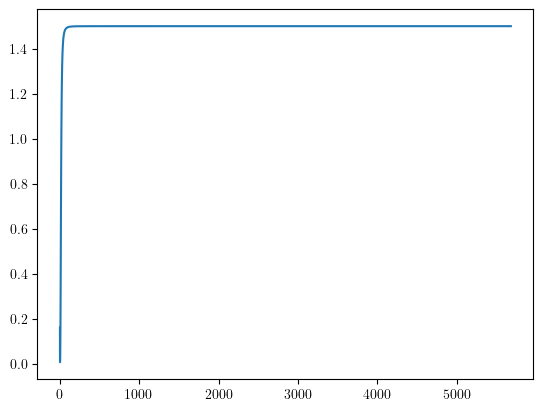

In [19]:
R_atm = giant_atmosphere["radius"]
k2 = giant_atmosphere["k2"]

x = R_atm/min_core_radius

func = lambda x: k2_func(x, R_neptune, rho_neptune, rho_air, rigidity_earth)


fig, ax = plt.subplots()
ax.plot(x, k2, label="simulation")
ax.plot(x, func(x), label="fit")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

### Fitting softly transitioning linear functions

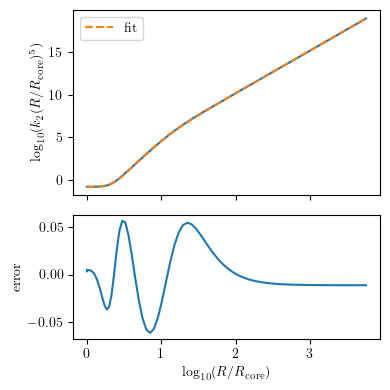

In [ ]:
R_atm = giant_atmosphere["radius"]
k2 = giant_atmosphere["k2"]

x = np.log10(R_atm/min_core_radius)
y = np.log10(k2*(R_atm/min_core_radius)**5)

def g(x,x0,h):
    return np.log(1+np.exp((x-x0)*h))/h

def f(x,x0,x1,a,h0,h1):
    b=5
    return a*g(x,x0,h0) + (b-a)*g(x-x0,x1-x0,h1)+x0*a-x1*b

x0 = 0.4
x1 = 0.8
h = 10
a = 10
b = 5

popt,pcov = curve_fit(f, x, y, p0=[x0,x1,a,h,h])
x0, x1, a, h0, h1 = popt

fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5, 1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))

"""
x_int = np.linspace(x[0],x0,100)
ax.plot(x_int,x_int*0+np.log10(k2_core(rigidity_earth, rho_neptune, min_core_radius)), label="$k_2=k_{2,\\mathrm{core}}$")

x_int = np.linspace(x1,x[-1],100)
ax.plot(x_int,5*x_int, label="$k_2=3/2$")

x_int = np.linspace(x0,x1,100)
ax.plot(x_int,a*(x_int-x0)-x1*b+x0*a)

err_ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
err_ax.set_ylabel("error")
"""

err_ax.set_xlabel("$\\log_{10}(R/R_\\mathrm{core})$")
ax.set_ylabel("$\\log_{10}(k_2(R/R_\\mathrm{core})^5)$")
err_ax.set_ylabel("error")

ax.legend()
fig.tight_layout()
plt.show()

### Fitting with three linear functions
Below we fit with all parameters free, so we have
$$
f(x)=
\begin{cases}
y_0, \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad x<x_0\\
y_0+a(x-x_0),\quad\quad\quad\quad\quad\quad\quad x_0<x<x_1\\
y_0+a(x_1-x_0)+b(x-x_1),\quad x>x_1
\end{cases}
$$

x0 = 0.30
x1 = 1.23
a = 7.55
b = 5.03
y0 = -0.77
MSD = 1.76e-03


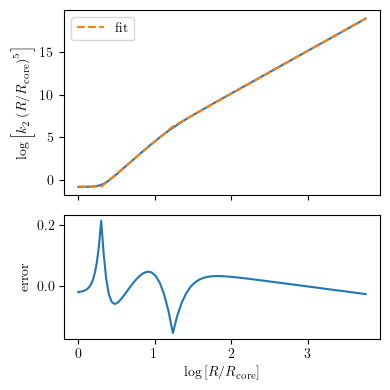

In [ ]:
y0 = np.log10(k2_core(rigidity_earth, rho_neptune, min_core_radius))

def f(x,x0,x1,a,b,y0):
    y = y0 + a*(x1-x0) + b*(x-x1)
    y[x<x1] = y0 + a*(x[x<x1]-x0)
    y[x<x0] = y0
    return y

# Fit
popt,pcov = curve_fit(f, x, y, p0=[0.3,0.8,10,5,-0.5])

# Print results
variables = ["x0","x1","a","b","y0"]
for i in range(len(variables)):
    print(f"{variables[i]} = {popt[i]:.2f}")
print(f"MSD = {np.sum((y-f(x,*popt))**2)/len(x):.2e}")

# Plot results
fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5,1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))
err_ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")
err_ax.set_ylabel("error")
ax.legend()
fig.tight_layout()
fig.savefig("linear_fit.png",dpi=300)
plt.show()

Below, we require that $y_0$ is equal to $\log_{10}\left(k_{2,\mathrm{core}}\right)$, since this is where the atmosphere is not there, and we have a simple analytical equation for the core's Love number.

Also, for large radii the atmosphere is dominant, so we effectively have a uniform planet with zero rigidity, which has $k_2=3/2$ (see Tremaine page 405), therefore
$$
y_0+a(x_1-x_0)+b(x-x_1)=\log_{10}{\left[k_2 \left(\frac{R}{R_\mathrm{core}}\right)^5\right]}
$$
which, using the definition of $x$ above, becomes
$$
y_0+a(x_1-x_0)+b(x-x_1)=\log_{10}{k_2} +5x
$$
this is solved by
$$
b=5
$$
and
$$
a = \frac{\log_{10}{k_2}+bx_1-y_0}{x_1-x_0}
$$
with $k_2=3/2$.

With these constraints, we can just fit for $x_0$ and $x_1$ (which are also optimized for the slope inbetween being suitable).

9.940195220667986
9.940195309540258
9.940195102884557
8.32145131023326
8.321451360112034
8.321451240831003
7.678490348906661
7.678490385813753
7.678490296119733
7.503663549304914
7.503663582940454
7.503663500774627
7.4542792949126175
7.454279327603354
7.454279247577767
7.453434358771939
7.453434391447283
7.453434311457232
7.453434084875065
x0 = 0.29
x1 = 1.28
7.453434084875065
MSD = 1.86e-03
7.453434084875065
7.453434084875065


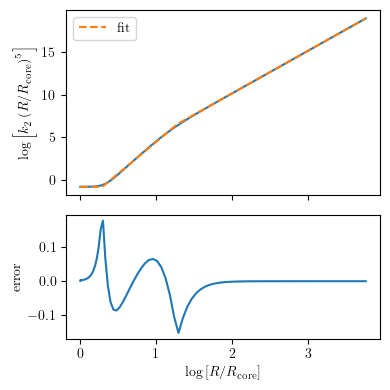

In [ ]:
y0 = np.log10(k2_core(rigidity_earth, rho_neptune, min_core_radius))
b = 5

def f(x,x0,x1):
    a = (np.log10(3/2)+b*x1-y0)/(x1-x0)
    print(a)
    y = y0 + a*(x1-x0) + b*(x-x1)
    y[x<x1] = y0 + a*(x[x<x1]-x0)
    y[x<x0] = y0
    return y

popt,pcov = curve_fit(f, x, y, p0=[0.3,0.8])

# print results
variables = ["x0","x1"]
for i in range(len(variables)):
    print(f"{variables[i]} = {popt[i]:.2f}")
print(f"MSD = {np.sum((y-f(x,*popt))**2)/len(x):.2e}")

# Plot fit
fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5,1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))
err_ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")
err_ax.set_ylabel("error")
ax.legend()
fig.tight_layout()
plt.show()

using
$$
x_0 = \frac{y_0+(a-b)x_1-\log_{10}{k_2}}{a}
$$

a = 7.45
x1 = 1.28
MSD = 1.86e-03


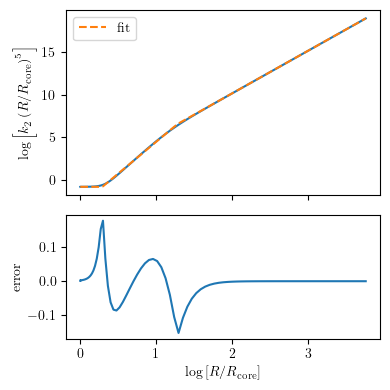

In [ ]:
y0 = np.log10(k2_core(rigidity_earth, rho_neptune, min_core_radius))
b = 5

def f(x,a,x1):
    x0 = (y0+(a-b)*x1-np.log10(3/2))/a
    y = y0 + a*(x1-x0) + b*(x-x1)
    y[x<x1] = y0 + a*(x[x<x1]-x0)
    y[x<x0] = y0
    return y

popt,pcov = curve_fit(f, x, y, p0=[7.5,0.8])

# print results
variables = ["a","x1"]
for i in range(len(variables)):
    print(f"{variables[i]} = {popt[i]:.2f}")
print(f"MSD = {np.sum((y-f(x,*popt))**2)/len(x):.2e}")

# Plot fit
fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5,1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))
err_ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")
err_ax.set_ylabel("error")
ax.legend()
fig.tight_layout()
plt.show()

### Concatenating all data for single fit

In [ ]:
x_concat = np.array([])
y_concat = np.array([])
y0_concat = np.array([])
for i in range(no_core_radii):
    R_core = data[i]["core_radius"]
    R_atm = data[i]["radius"]
    k2 = data[i]["k2"]
    
    xi = np.log10(R_atm/R_core)
    x_concat = np.concatenate((x_concat,xi))

    yi = np.log10(k2*(R_atm/R_core)**5)
    y_concat = np.concatenate((y_concat,yi))

    y0i = np.log10(np.repeat(k2_core(rigidity_earth, rho_neptune, R_core), len(R_atm)))
    y0_concat = np.concatenate((y0_concat,y0i))


a = 7.45
x1 = 1.28
MSD = 1.86e-03


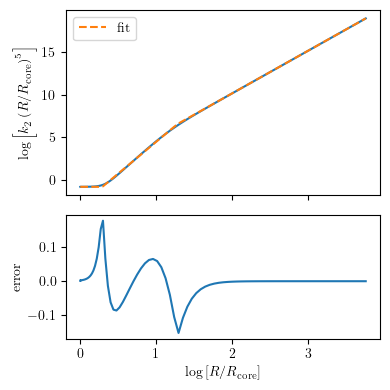

In [ ]:
def f(x_concat,x0,x1):
    x0_concat = (y0_concat+(a-b)*x1-np.log10(3/2))/a
    y = y0_concat + a*(x1-x0_concat) + b*(x_concat-x1)
    y[x_concat<x1] = y0_concat[x_concat<x1] + a*(x_concat[x_concat<x1]-x0_concat[x_concat<x1])
    y[x_concat<x0] = y0_concat[x_concat<x0]
    return y

y0 = np.log10(k2_core(rigidity_earth, rho_neptune, min_core_radius))
b = 5

def f(x,a,x1):
    x0 = (y0+(a-b)*x1-np.log10(3/2))/a
    y = y0 + a*(x1-x0) + b*(x-x1)
    y[x<x1] = y0 + a*(x[x<x1]-x0)
    y[x<x0] = y0
    return y

popt,pcov = curve_fit(f, x, y, p0=[7.5,0.8])

# print results
variables = ["a","x1"]
for i in range(len(variables)):
    print(f"{variables[i]} = {popt[i]:.2f}")
print(f"MSD = {np.sum((y-f(x,*popt))**2)/len(x):.2e}")

# Plot fit
fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5,1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))
err_ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")
err_ax.set_ylabel("error")
ax.legend()
fig.tight_layout()
plt.show()

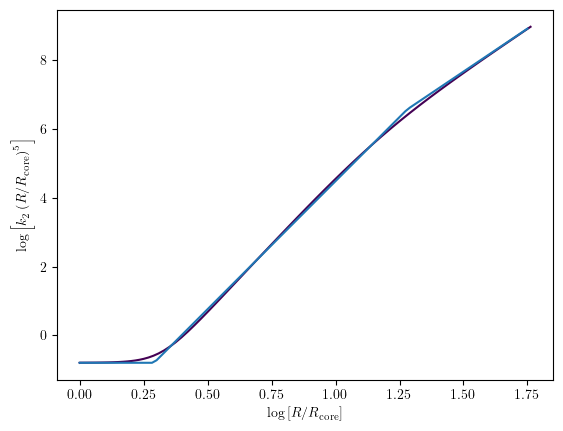

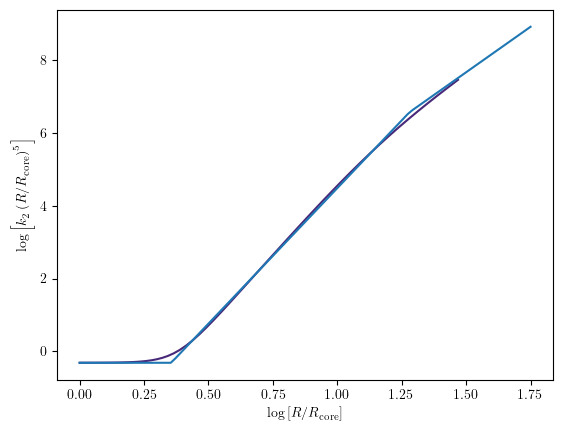

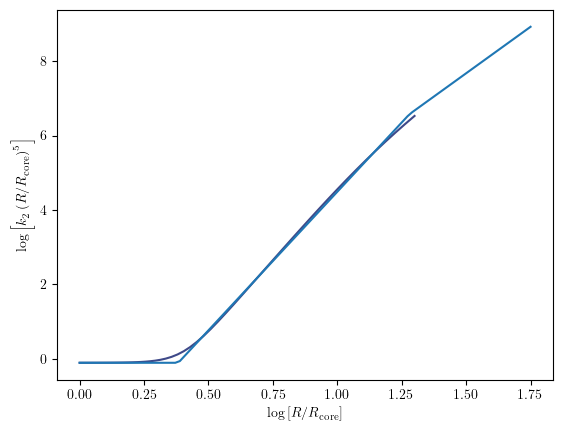

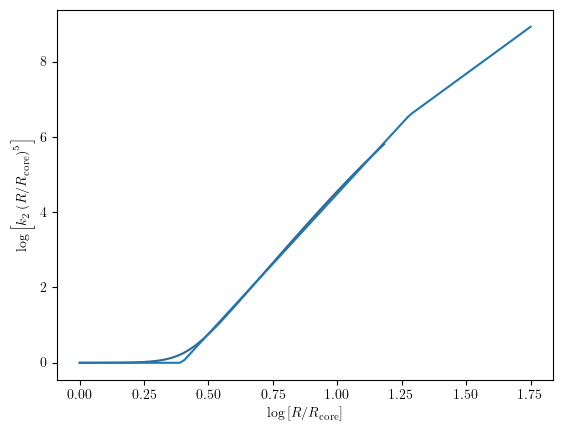

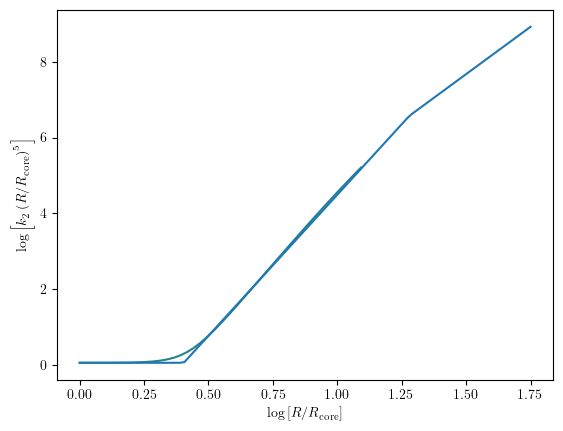

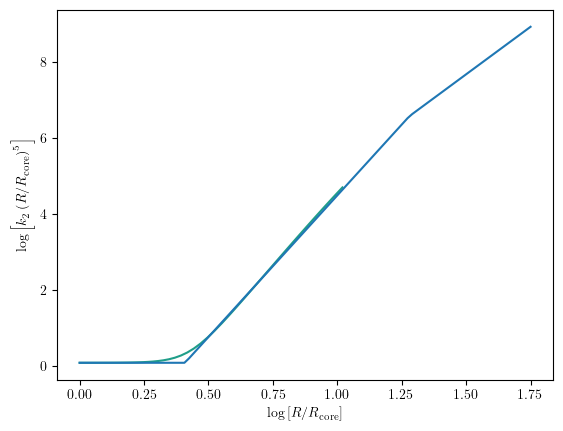

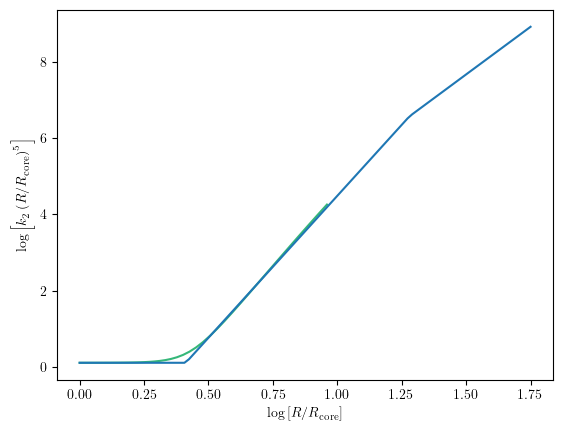

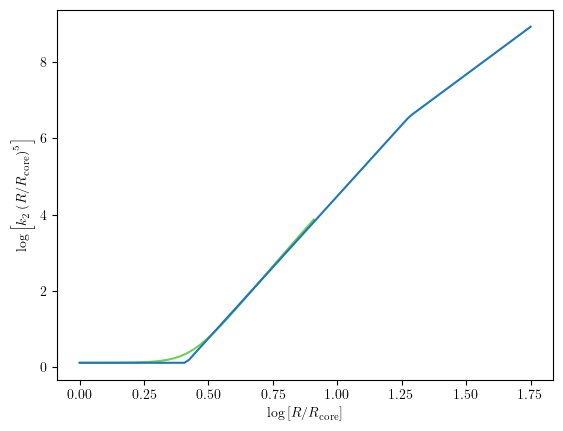

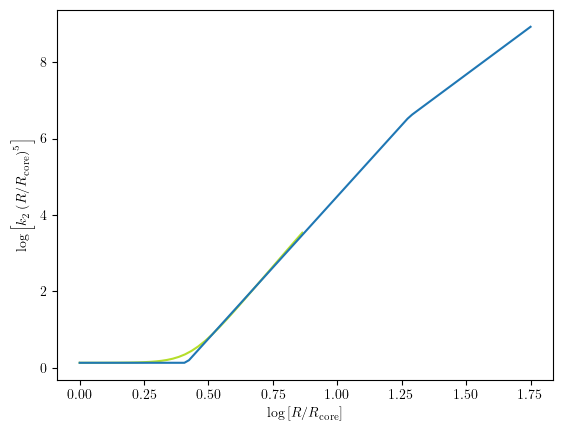

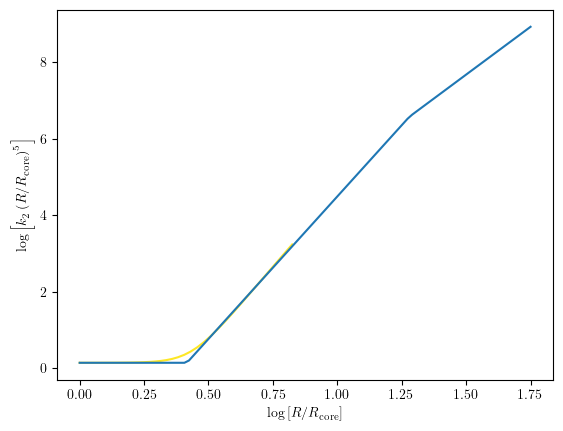

In [ ]:
def f(x,a,x1,y0,b=5):
    x0 = (y0+(a-b)*x1-np.log10(3/2))/a
    y = y0 + a*(x1-x0) + b*(x-x1)
    y[x<x1] = y0 + a*(x[x<x1]-x0)
    y[x<x0] = y0
    return y

x_interp = np.linspace(0,1.75,100)


for i in range(len(data)):
    fig, ax = plt.subplots()
    R_core = data[i]["core_radius"]
    R_atm = data[i]["radius"]
    k2 = data[i]["k2"]
    y0 = np.log10(k2_core(rigidity_earth,rho_neptune,R_core))
    ax.plot(np.log10(R_atm/R_core), np.log10(k2*(R_atm/R_core)**5), color=cmap(norm(R_core/R_neptune)))
    ax.plot(x_interp, f(x_interp, 7.45, 1.28, y0))


    ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
    ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")

In [ ]:
print(10**1.28)
print(((10**1.28)**3-1)*rho_air/rho_neptune)

19.054607179632473
5.446653149391194


1000


TypeError: f() missing 1 required positional argument: 'y0'

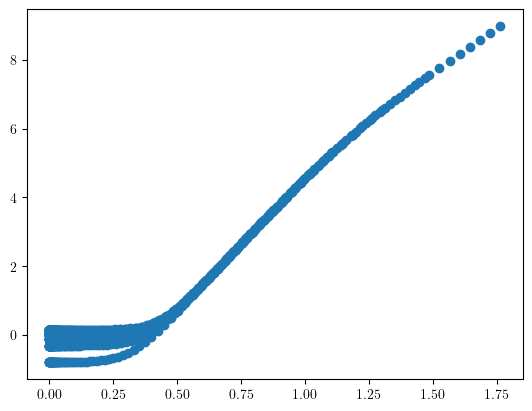

In [ ]:
plt.figure()
plt.scatter(x_concat, y_concat)
x_interp = np.repeat(np.linspace(0,2,100),len(core_radii))
print(len(x_interp))
print(len(f(x_interp,7.45,1.28)))
print(len(y0_concat))
plt.scatter(x_interp, f(x_interp,0.29,1.28), color="red", label="fit")

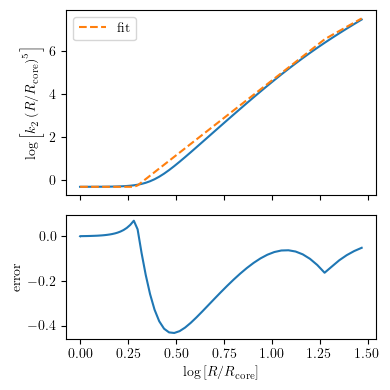

In [ ]:
idx = 1

R_atm = np.array([d["radius"] for d in data[idx]])
k2 = np.array([d["k2"] for d in data[idx]])

x = np.log10(R_atm/core_radii[idx])
y = np.log10(k2*(R_atm/core_radii[idx])**5)

y0 = np.log10(k2_core(rigidity_earth, rho_neptune, core_radii[idx]))


# Plot fit
fig, (ax,err_ax) = plt.subplots(nrows=2,sharex=True, figsize=(4,4), gridspec_kw={'height_ratios': [1.5,1]})
ax.plot(x,y)
ax.plot(x,f(x,*popt), linestyle="--", label="fit")
err_ax.plot(x, y-f(x,*popt))
err_ax.set_xlabel("$\\log{\\left[R/R_\\mathrm{core}\\right]}$")
ax.set_ylabel("$\\log{\\left[k_2\\left(R/R_\\mathrm{core}\\right)^5\\right]}$")
err_ax.set_ylabel("error")
ax.legend()
fig.tight_layout()
plt.show()